## Lab 19 - Functions and conditional statements

We will return to the MoMA artwork dataset from Lab 5 for this lab.  The data can be downloaded from GitHub here: [Artworks.csv](https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv) 

More information about the data is available at [https://github.com/MuseumofModernArt/collection](https://github.com/MuseumofModernArt/collection).

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

### Loading and cleaning the data

Load the data into a dataframe called `art`.  The date column, which is the date the art was created, uses several different terms to indicate the date is unknown.  To replace these with NaN (Pandas' representation for missing data), use the parameter `na_values = ["Unknown", "n.d.", "nd", "n.d", "TBC","TBD"]` in your `read_csv()` function.

In [3]:
art = pd.read_csv("../../data/Artworks.csv", na_values = ["Unknown", "n.d.", "nd", "n.d", "TBC","TBD"])
art.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,Architecture,Architecture & Design,1997-01-15,Y,4,http://www.moma.org/collection/works/4,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,2.1995,Architecture,Architecture & Design,1995-01-17,Y,5,http://www.moma.org/collection/works/5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,Architecture,Architecture & Design,1997-01-15,Y,6,http://www.moma.org/collection/works/6,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


We will next drop the rows with missing values in the Gender and Date columns.  We don't want to drop rows with missing values in any column because many of the dimensions (last 9 columns) are missing, since they are not applicable.

In [7]:
art = art.dropna(subset=['Gender','Date', 'Nationality'])
art.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,Architecture,Architecture & Design,1997-01-15,Y,4,http://www.moma.org/collection/works/4,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,2.1995,Architecture,Architecture & Design,1995-01-17,Y,5,http://www.moma.org/collection/works/5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,Architecture,Architecture & Design,1997-01-15,Y,6,http://www.moma.org/collection/works/6,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


### Number of artists for each artwork

Suppose we want to know how many pieces of art are made by 1 artist, 2 artists, etc.  There is no column with this information, but we can get it from the `Gender` column.

First, use `value_counts()` to show the different possible values in the `Gender` column.

In [8]:
art["Gender"].value_counts()

(Male)                                                                                                                                                                                    102711
(Female)                                                                                                                                                                                   17551
()                                                                                                                                                                                          6589
(Male) (Male)                                                                                                                                                                               1779
(Male) (Male) (Male)                                                                                                                                                                         904
(Male) ()                          

How can you tell from the `Gender` column how many artists (or other entities, like companies) created an artwork?

We are going to count how many ( are in the `Gender` column in each row and store that number in a new column, representing the number of artists.

To do the counting, we define a function that outputs (returns) the the number of times a ( appears in the input x:

In [18]:
def count_artists(x):
    return x.count("(")

We can call (run) our function on some sample `Gender` column values to test it out:

In [19]:
count_artists("(Female)")

1

In [20]:
count_artists("(Male) (Male)")

2

In [21]:
count_artists("() (Male)")

2

Does our function look like it works?  We can apply it to all rows in the `Gender` column and store the output in a new column called `NumArtists`.

In [22]:
art["NumArtists"] = art["Gender"].apply(count_artists)

Display the dataframe `art`.  Is your new column there?  Check a few of the rows to see if it is correct.

In [16]:
art.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),NumArtists
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN,1
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN,1
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,Architecture,Architecture & Design,1997-01-15,Y,4,http://www.moma.org/collection/works/4,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN,1
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,2.1995,Architecture,Architecture & Design,1995-01-17,Y,5,http://www.moma.org/collection/works/5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN,1
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,Architecture,Architecture & Design,1997-01-15,Y,6,http://www.moma.org/collection/works/6,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN,1


Create a bar plot of the number of artists for each work.

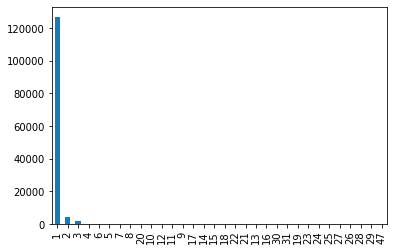

In [17]:
art["NumArtists"].value_counts().plot(kind = "bar")

What about if we wanted to know which pieces of art were made by an American, and exactly how many American artists were involved?  

Try to make a new function called count_Americans that counts how many times `(American)` appears in the input `x`.

In [27]:
def count_Americans(x):
    return x.count("(American")

Now, apply your function to the `Nationality` column to create a new column called `numAmericans`.

In [28]:
art["NumAmericans"] = art["Nationality"].apply(count_Americans)

Display `art` to check that the new column was created correctly.

Create a bar plot of the number of Americans for the artworks.

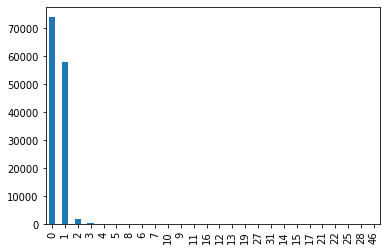

In [29]:
art["NumAmericans"].value_counts().plot(kind = "bar")

How does the plot change from the number of artists one?

### Grouping artwork by date

Suppose we want to assign each piece of art to Pre-Modern (created before 1860), Modern (created 1860 - 1845), or Contemporary (created after 1945).

We can make a function that takes in the date and outputs the period.  Some of the dates are given as ranges or as c. 1900, so we will just assign those to the period "Range" (for range of dates).

In [32]:
def period(x):
    if len(x) > 4:
        return "Range"
    elif int(x) < 1860:
        return "Pre-Modern"
    elif int(x) <= 1945:
        return "Modern"
    else:
        return "Contemporary"

Can you apply this function to the column `Date` to create a new column `Period`?

In [33]:
art["Period"] = art["Date"].apply(period)

Display `art` to check that the column `Period` was created correctly.

Now make a bar chart of the distribution of art period.

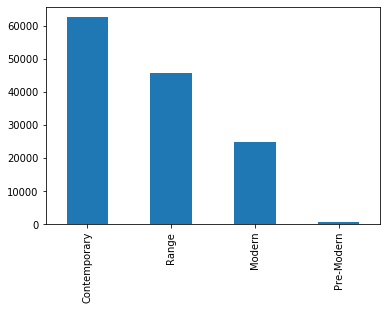

In [34]:
art["Period"].value_counts().plot(kind = "bar")

### Challenger:  Area of round objects
Some of the artwork have a diameter.  Create a new dataframe of only objects with a value in this column by dropping the rows with missing values.  Assuming these objects are all 2D (a big assumption!), let's create a new column with the area of this art.  Remember that:

area = $\pi$(diameter/2)^2

You can get the value of $\pi$ with `np.pi`.

In [5]:
has_diameter = art.dropna(subset = ["Diameter (cm)"])
has_diameter

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
961,Vase,Hans Coper,1235,"(British, born Germany. 1920–1981)",(British),(1920),(1981),(Male),c. 1960,Stoneware,"7 3/4 x 7"" (19.7 x 17.8 cm)",Given anonymously,2250.2001,Design,Architecture & Design,2001-09-24,Y,1084,http://www.moma.org/collection/works/1084,http://www.moma.org/media/W1siZiIsIjU5NDQ0Il0s...,NaN,NaN,17.780000,19.685000,NaN,NaN,NaN,NaN,NaN
962,Bowl,James Prestini,4729,"(American, born Italy. 1908–1993)",(American),(1908),(1993),(Male),1949,Black walnut,"2 3/4 x 5 1/2"" (7 x 14 cm)",Gift of the designer,2277.2001,Design,Architecture & Design,2001-09-24,Y,1087,http://www.moma.org/collection/works/1087,http://www.moma.org/media/W1siZiIsIjU5MTYzIl0s...,NaN,NaN,13.970000,6.985000,NaN,NaN,NaN,NaN,NaN
963,Prisma Tumblers,Kaj Franck,1968,"(Finnish, 1911–1989)",(Finnish),(1911),(1989),(Male),1967,Pressed glass,"2 5/8 x 2 15/16"" (6.6 x 7.5 cm)",Given anonymously,2254.2001.1-3,Design,Architecture & Design,2001-09-24,Y,1091,http://www.moma.org/collection/works/1091,http://www.moma.org/media/W1siZiIsIjIxMjA2OSJd...,NaN,NaN,7.461300,6.600000,NaN,NaN,NaN,NaN,NaN
964,Vase,Josef Hoffmann,2694,"(Austrian, 1870–1956)",(Austrian),(1870),(1956),(Male),c. 1938,Glass,"5 7/8 x 4 1/2"" (14.9 x 11.4 cm)",Given anonymously,2260.2001,Design,Architecture & Design,2001-09-24,Y,1098,http://www.moma.org/collection/works/1098,http://www.moma.org/media/W1siZiIsIjIxMjA3MyJd...,NaN,NaN,11.430000,14.922500,NaN,NaN,NaN,NaN,NaN
966,Tray,Unknown Designer,6011,(Nationality unknown),(Nationality unknown),(0),(0),(),NaN,Glass,"2 1/8 x 11 3/4"" (5.4 x 29.9 cm)",Given anonymously,2309.2001,Design,Architecture & Design,2001-09-24,Y,1100,http://www.moma.org/collection/works/1100,http://www.moma.org/media/W1siZiIsIjIxMjA4NyJd...,NaN,NaN,29.900000,5.397500,NaN,NaN,NaN,NaN,NaN
968,Vase,Hans Coper,1235,"(British, born Germany. 1920–1981)",(British),(1920),(1981),(Male),c. 1960,Stoneware,"8 x 3"" (20.3 x 7.6 cm)",Given anonymously,2249.2001,Design,Architecture & Design,2001-09-24,Y,1102,http://www.moma.org/collection/works/1102,http://www.moma.org/media/W1siZiIsIjU5NDQzIl0s...,NaN,NaN,7.620000,20.320000,NaN,NaN,NaN,NaN,NaN
969,Battery Jar,"Corning Glass Works, Corning, NY",1249,(est. 1851),(American),(1851),(0),(),1920s,Pyrex glass,"23 7/8 x 12"" (60.7 x 30.5 cm)",Gift of the manufacturer,2252.2001,Design,Architecture & Design,2001-09-24,Y,1110,http://www.moma.org/collection/works/1110,NaN,NaN,NaN,30.480100,60.700000,NaN,NaN,NaN,NaN,NaN
970,Vase,Hans Coper,1235,"(British, born Germany. 1920–1981)",(British),(1920),(1981),(Male),c. 1963,Stoneware,"6 x 4 1/8"" (15.3 x 10.5 cm)",Given anonymously,2251.2001,Design,Architecture & Design,2001-09-24,Y,1111,http://www.moma.org/collection/works/1111,http://www.moma.org/media/W1siZiIsIjU5NDQ1Il0s...,NaN,NaN,10.477500,15.300000,NaN,NaN,NaN,NaN,NaN
971,Bowl,Ronald Hayes Pearson,4532,"(American, 1924–1996)",(American),(1924),(1996),(Male),c. 1950-51,Spun bronze,"1 9/16 x 11 7/8"" (4 x 30.2 cm)","Gift of Bonniers, Inc.",2275.2001,Design,Architecture & Design,2001-09-24,Y,1114,http://www.moma.org/collection/works/1114,http://www.moma.org/media/W1siZiIsIjIzMDI0NCJd...,NaN,NaN,30.162600,4.000000,NaN,NaN,NaN,NaN,NaN
972,Bowl,James Prestini,4729,"(American, born Italy. 1908–1993)",(American),(1908),(1993),(Male),c. 1951,Mexican mahogany,"4 1/4 x 9 3/8"" (10.8 x 23.8 cm)",Gift of the designer,2278.2001,Design,Architecture & Design,2001-09-24,Y,1116,http://www.moma.org/collection/works/1116,http://www.moma.org/media/W1siZiIsIjIzMDI0OCJd...,NaN,NaN,23.812500,10.795000,NaN,NaN,NaN,NaN,NaN


In [6]:
def compute_area(x):
    return np.pi*(x/2)*(x/2)

In [8]:
has_diameter["area"] = has_diameter["Diameter (cm)"].apply(compute_area)

/Users/megan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
has_diameter.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),area
961,Vase,Hans Coper,1235,"(British, born Germany. 1920–1981)",(British),(1920),(1981),(Male),c. 1960,Stoneware,"7 3/4 x 7"" (19.7 x 17.8 cm)",Given anonymously,2250.2001,Design,Architecture & Design,2001-09-24,Y,1084,http://www.moma.org/collection/works/1084,http://www.moma.org/media/W1siZiIsIjU5NDQ0Il0s...,NaN,NaN,17.7800,19.6850,NaN,NaN,NaN,NaN,NaN,248.286665
962,Bowl,James Prestini,4729,"(American, born Italy. 1908–1993)",(American),(1908),(1993),(Male),1949,Black walnut,"2 3/4 x 5 1/2"" (7 x 14 cm)",Gift of the designer,2277.2001,Design,Architecture & Design,2001-09-24,Y,1087,http://www.moma.org/collection/works/1087,http://www.moma.org/media/W1siZiIsIjU5MTYzIl0s...,NaN,NaN,13.9700,6.9850,NaN,NaN,NaN,NaN,NaN,153.279012
963,Prisma Tumblers,Kaj Franck,1968,"(Finnish, 1911–1989)",(Finnish),(1911),(1989),(Male),1967,Pressed glass,"2 5/8 x 2 15/16"" (6.6 x 7.5 cm)",Given anonymously,2254.2001.1-3,Design,Architecture & Design,2001-09-24,Y,1091,http://www.moma.org/collection/works/1091,http://www.moma.org/media/W1siZiIsIjIxMjA2OSJd...,NaN,NaN,7.4613,6.6000,NaN,NaN,NaN,NaN,NaN,43.723899
964,Vase,Josef Hoffmann,2694,"(Austrian, 1870–1956)",(Austrian),(1870),(1956),(Male),c. 1938,Glass,"5 7/8 x 4 1/2"" (14.9 x 11.4 cm)",Given anonymously,2260.2001,Design,Architecture & Design,2001-09-24,Y,1098,http://www.moma.org/collection/works/1098,http://www.moma.org/media/W1siZiIsIjIxMjA3MyJd...,NaN,NaN,11.4300,14.9225,NaN,NaN,NaN,NaN,NaN,102.608265
966,Tray,Unknown Designer,6011,(Nationality unknown),(Nationality unknown),(0),(0),(),NaN,Glass,"2 1/8 x 11 3/4"" (5.4 x 29.9 cm)",Given anonymously,2309.2001,Design,Architecture & Design,2001-09-24,Y,1100,http://www.moma.org/collection/works/1100,http://www.moma.org/media/W1siZiIsIjIxMjA4NyJd...,NaN,NaN,29.9000,5.3975,NaN,NaN,NaN,NaN,NaN,702.153812
